In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import statsmodels.api as sm
import scipy.stats
from statsmodels.formula.api import ols

In [16]:
%pip install seaborn
import seaborn as sns

In [17]:
from js import fetch
import io

In [6]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

resp = await fetch(URL)

boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df = pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## TASK 2

Question 2a For the "Median value of owner-occupied homes" provide a boxplot

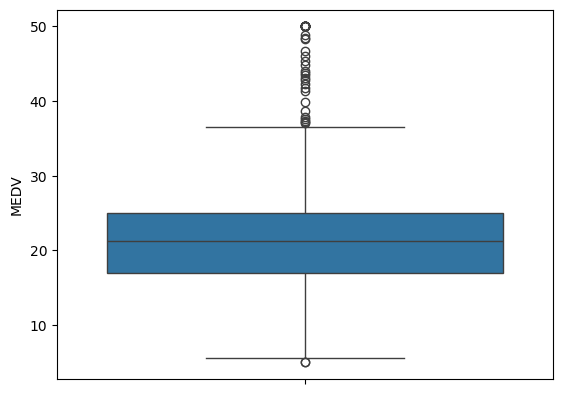

In [39]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
pyplot.show()

Question2b Provide a  bar plot for the Charles river variable

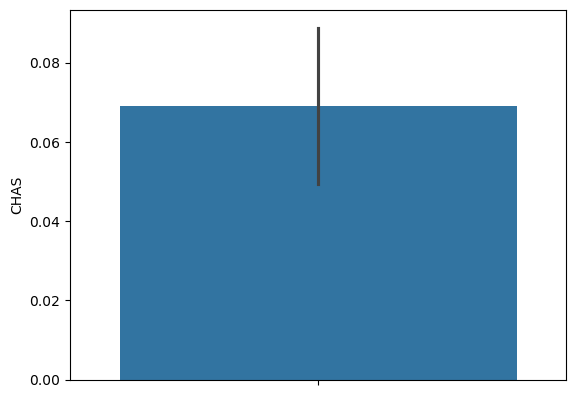

In [40]:
ax = sns.barplot(y = 'CHAS', data = boston_df)
pyplot.show()

Question 2c: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [41]:
boston_df.loc[(boston_df['AGE'] <= 35),'age_group'] = ' 35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70),'age_group'] = '70 years and older'

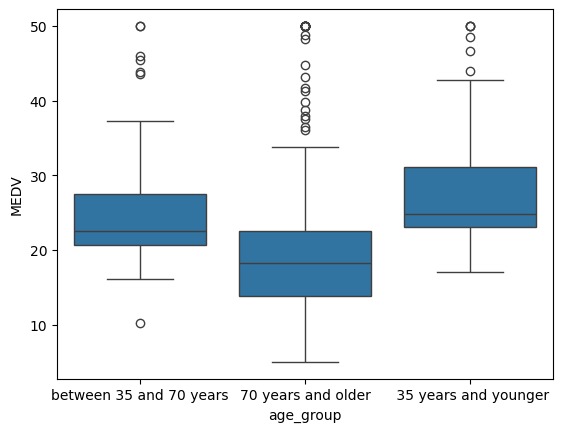

In [42]:
ax = sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df )
pyplot.show()

Question 2d: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

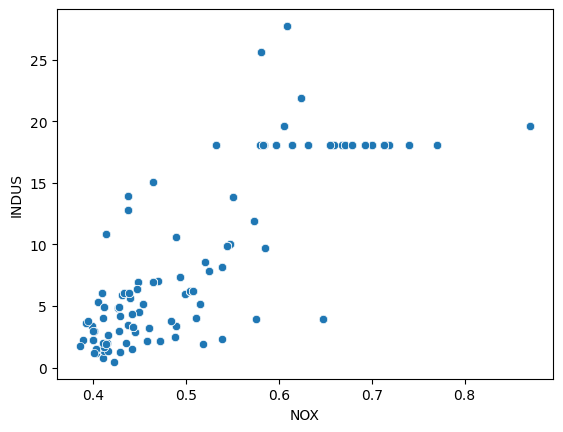

In [44]:
ax = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
pyplot.show()

Question 2c: Create a histogram for the pupil to teacher ratio variable

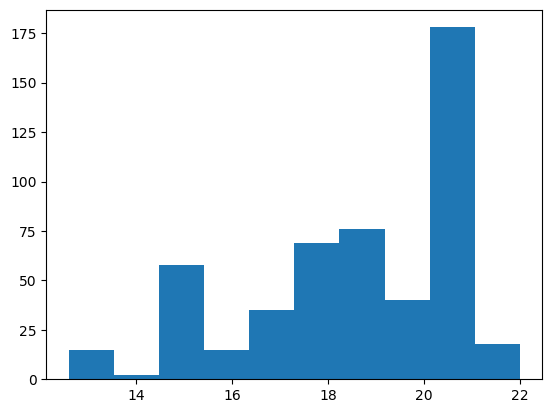

In [45]:
ax = pyplot.hist(x = 'PTRATIO', data = boston_df)
pyplot.show()

## TASK 3

QUESTION 3a : Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [36]:
#Null hypothesis_H_0 = There is no significant difference in median value of houses bounded by the Charles river
#Alternative_hypothesis_H_1 != There is a significant difference in median value of houses bounded by the Charles river
#Use α = 0.05

In [8]:
X = boston_df['MEDV']
y = boston_df['CHAS']
X = sm.add_constant(X)
model = sm.OLS(y,X ).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CHAS   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           7.39e-05
Time:                        04:22:02   Log-Likelihood:                -16.144
No. Observations:                 506   AIC:                             36.29
Df Residuals:                     504   BIC:                             44.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0399      0.029     -1.354      0.176      -0.098       0.018
MEDV           0.0048      0.001      3.996      0.000       0.002       0.007
==============================================================================
Omnibus:                      353.684   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2621.933
Skew:                           3.251   Prob(JB):                         0.00
Kurtosis:                      12.060   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: The p-value is greater than the alpha (α) level = 0.05, so we fail to reject the null hypothesis as there is no evidence that there is a difference in median value of houses bounded by the Charles river

Question 3b: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [46]:
#Null hypothesis_H_0 = There is no significant difference between Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
#Alternative_hypothesis_H_1 != There is a significant difference between Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [19]:
boston_df.loc[(boston_df['AGE'] <= 35),'age_group'] = ' 35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70),'age_group'] = '70 years and older'

In [22]:
lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


Conclusion : The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference between Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [34]:
X = boston_df['AGE']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X ).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           1.57e-18
Time:                        04:44:33   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9787      0.999     31.006      0.000      29.016      32.942
AGE           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Question 3c: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#Null hypothesis_H_0 = There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#Alternative_hypothesis_H_1 != There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [29]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion: The p-value is greater than the alpha (α) level = 0.05, so we fail to reject the null hypothesis. Hence, we can conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Question 3d: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [38]:
#Null hypothesis_H_0 = There is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
#Alternative_hypothesis_H_1 !=  There is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

In [32]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X ).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        04:43:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion : The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes